Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('https://raw.githubusercontent.com/shakibkhandev/Datasets/main/csv/car_price_dataset.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [37]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   object
dtypes: int64(4), object(4)
memory usage: 271.4+ KB


In [38]:
# checking the number of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [39]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
1           2153
0           2123
2             40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
1                   3244
0                    994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
0    3892
1     448
Name: count, dtype: int64


Encoding the Categorical Data

In [50]:
# encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, "Trustmark Dealer":2}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\Professor\AppData\Local\Temp\ipykernel_11776\242576521.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, "Trustmark Dealer":2}},inplace=True)


In [51]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,Second Owner


Splitting the data and Target

In [52]:
X = car_dataset.drop(['name','selling_price', 'owner'],axis=1)
Y = car_dataset['selling_price']

In [53]:
print(X)

      year  km_driven  fuel  seller_type  transmission
0     2007      70000     0            1             0
1     2007      50000     0            1             0
2     2012     100000     1            1             0
3     2017      46000     0            1             0
4     2014     141000     1            1             0
...    ...        ...   ...          ...           ...
4335  2014      80000     1            1             0
4336  2014      80000     1            1             0
4337  2009      83000     0            1             0
4338  2016      90000     1            1             0
4339  2016      40000     0            1             0

[4340 rows x 5 columns]


In [54]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training and Test data

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [56]:
print(X_train,Y_train)

      year  km_driven  fuel  seller_type  transmission
1987  2018      52000     1            1             0
676   2011     140000     1            1             0
110   2019      15000     0            1             0
1398  2007      90000     0            1             0
122   2013      60000     1            1             0
...    ...        ...   ...          ...           ...
3335  2018      32000     0            1             0
1099  2014     110000     1            1             0
2514  2013      50000     1            1             0
3606  2010      70000     1            1             0
2575  2017      15000     0            0             0

[3906 rows x 5 columns] 1987    800000
676     311000
110     750000
1398     75000
122     165000
         ...  
3335    500000
1099    520000
2514    420000
3606    300000
2575    210000
Name: selling_price, Length: 3906, dtype: int64


In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3906 entries, 1987 to 2575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          3906 non-null   int64
 1   km_driven     3906 non-null   int64
 2   fuel          3906 non-null   int64
 3   seller_type   3906 non-null   int64
 4   transmission  3906 non-null   int64
dtypes: int64(5)
memory usage: 183.1 KB


Model Training

1. Linear Regression

In [58]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [59]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [60]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [61]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4270700386071742


Visualize the actual prices and Predicted prices

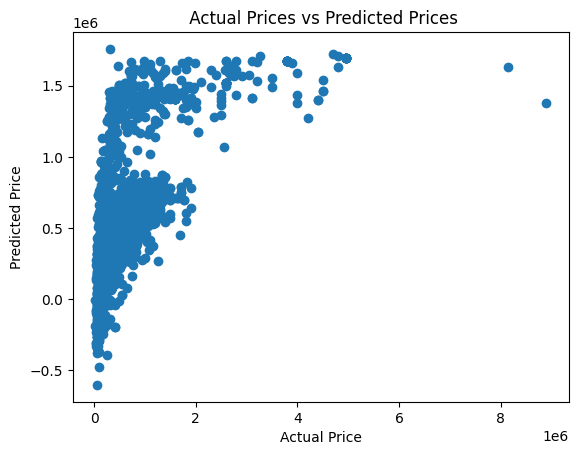

In [62]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [63]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [64]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5035628808178235


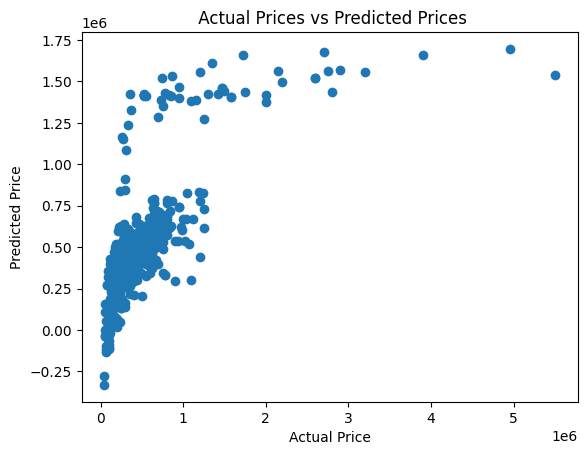

In [65]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [66]:
# loading the linear regression model
lass_reg_model = Lasso()

In [67]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [68]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [69]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4270700385568609


Visualize the actual prices and Predicted prices

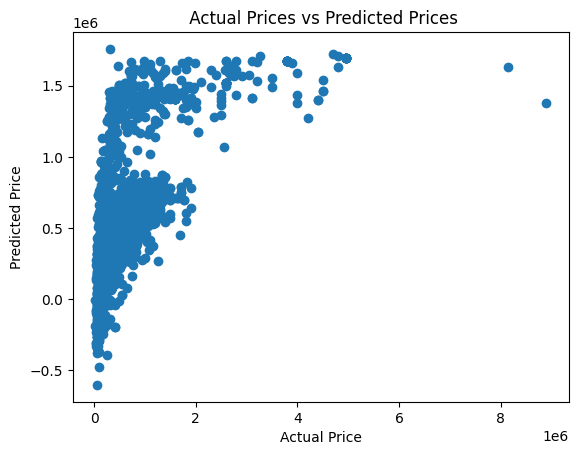

In [70]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [71]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [72]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5035622748454045


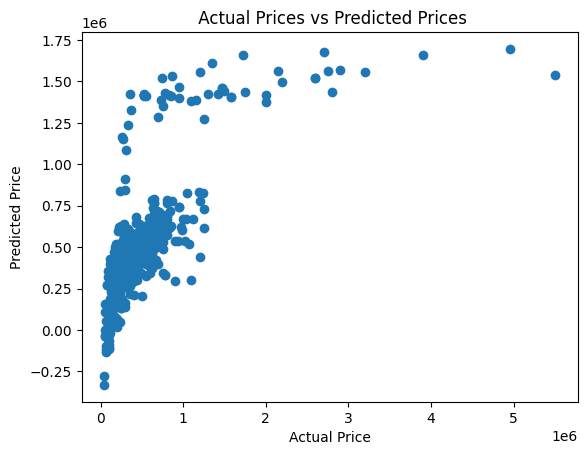

In [73]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()